In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('extras/S02-hw-dataset.csv')
print(df.head())
print(df.info())
print(df.describe())

   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None
         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.710189   613.127269
min     1.000000    5.000000  -1.000000     0.000000
25%    10.000000

In [57]:
print("Средняя доля пропусков")
print(df.isna().mean())
print("Кол-во дубликатов: " + str(df.duplicated().sum()))
invalid = (df['age'] > 100) | (df['age'] < 0) | (df['purchases'] < 0) | (df['revenue'] < 0) | (df['purchases'] > df['revenue'])
print("Невалидные значения из датасета")
print(df[invalid])


Средняя доля пропусков
user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64
Кол-во дубликатов: 1
Невалидные значения из датасета
    user_id    age country  purchases  revenue
5         6  120.0      FR         -1      785
10       11   24.0      US          4        0


In [71]:
print(df['country'].value_counts())
group = df.groupby('country').agg({
    'revenue' : ['mean', 'sum', 'max']
}
)
print(group)
df['revenue_group'] = pd.cut(df['revenue'], bins=[0, 500, 1000, 1500, 2000, 2500], right=False)
group1 = df.groupby('revenue_group').agg({
    'age' : ['mean'],
    'purchases' : ['mean']})
group1

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64
             revenue             
                mean    sum   max
country                          
CN       1054.000000   2108  1652
DE       1445.500000   8673  2475
FR        675.916667   8111  1608
RU        790.076923  10271  2086
US        557.375000   4459   980


C:\Users\rambe\AppData\Local\Temp\ipykernel_7132\2038663885.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group1 = df.groupby('revenue_group').agg({


,age,purchases
,mean,mean
revenue_group,,
"[0, 500)",36.500000,2.642857
"[500, 1000)",42.000000,5.214286
"[1000, 1500)",30.428571,6.000000
"[1500, 2000)",26.000000,6.500000
"[2000, 2500)",34.000000,9.000000


Text(0.5, 1.0, 'scatter')

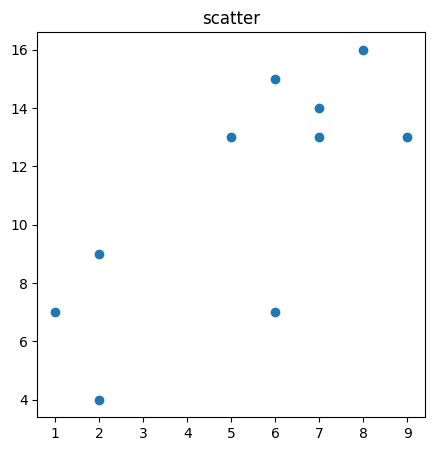

In [ ]:
x = np.random.randint(1, 10, size = 10)
y = x + np.random.randint(1, 10, size = 10)

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(x = x, y = y)
ax.set_title("scatter")

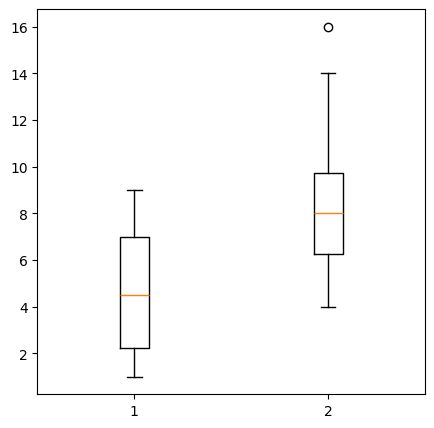

In [124]:
x = np.random.randint(1, 10, size = 10)
y = x + np.random.randint(1, 10, size = 10)
data = np.stack((x, y), axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
ax.boxplot(data)
plt.show()

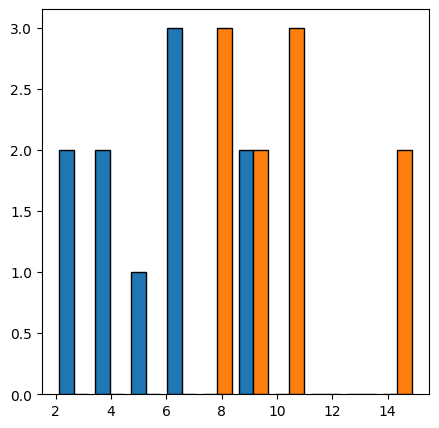

In [129]:
x = np.random.randint(1, 10, size = 10)
y = x + np.random.randint(1, 10, size = 10)
data = np.stack((x, y), axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(data, edgecolor='black')
plt.show()